In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
df = pd.read_csv('../data/Advertising.csv', index_col=0)

df


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [50]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [51]:
number_features = df.shape[1] - 1
number_features

3

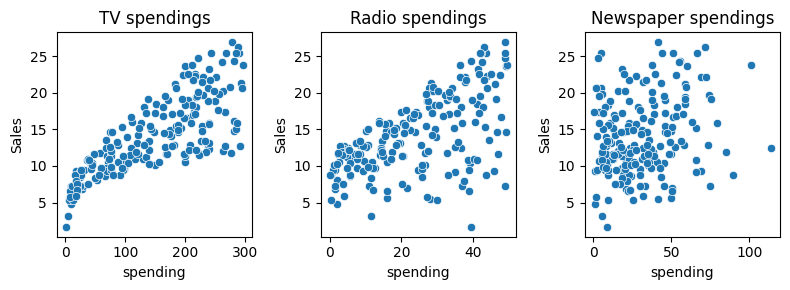

In [52]:
fig, ax = plt.subplots(1, number_features, figsize=(8, 3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=feature, y='Sales', ax=ax[i])
    ax[i].set(xlabel="spending", title=f"{feature} spendings")

fig.tight_layout()

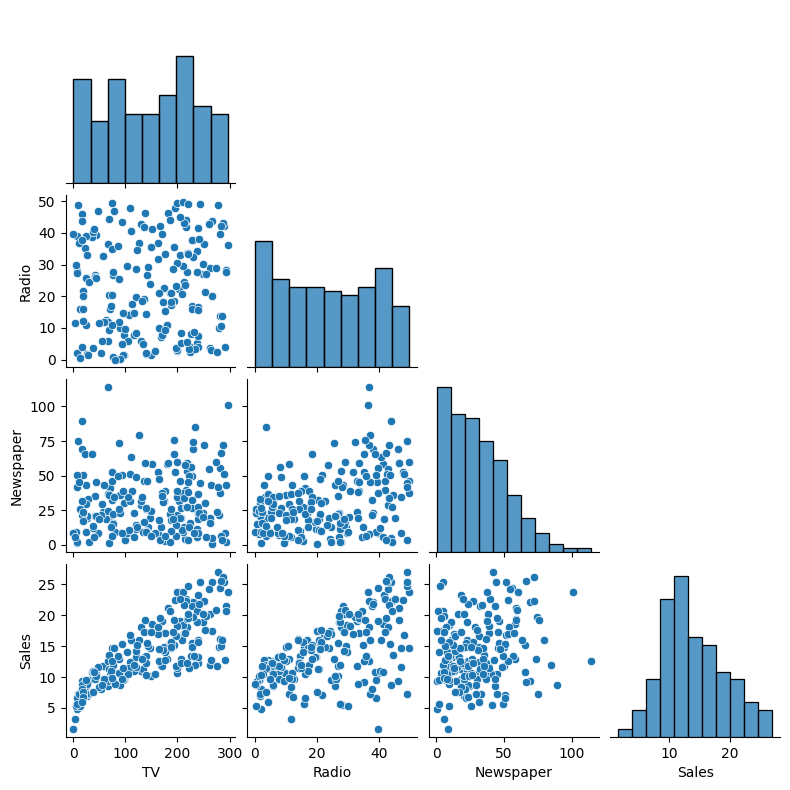

In [53]:
ax = sns.pairplot(df, corner=True, height=2)

intercept beta_0: 7.0326
intercept beta_1: 0.0475


[Text(0.5, 0, 'TV spendings'),
 Text(0, 0.5, 'Sales, thousand units'),
 Text(0.5, 1.0, 'TV advertisement linear regression')]

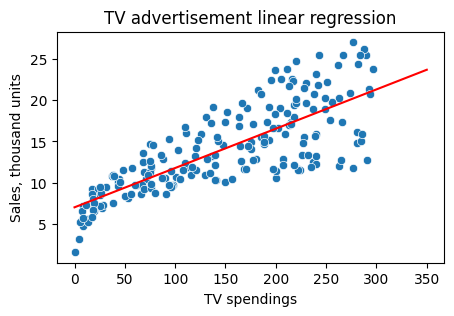

In [54]:
X, y = df["TV"], df["Sales"]

beta_1, beta_0 = np.polyfit(X, y, deg=1)

y_hat = lambda x: beta_0 + beta_1 * x

print(f"intercept beta_0: {beta_0:.4f}")
print(f"intercept beta_1: {beta_1:.4f}")

spend = np.linspace(0,350)
fig, ax = plt.figure(figsize=(5,3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales", ax=ax)
sns.lineplot(x=spend, y=y_hat(spend), color="red", ax=ax)
ax.set(xlabel="TV spendings", ylabel="Sales, thousand units", title="TV advertisement linear regression")

<Axes: xlabel='TV', ylabel='Sales'>

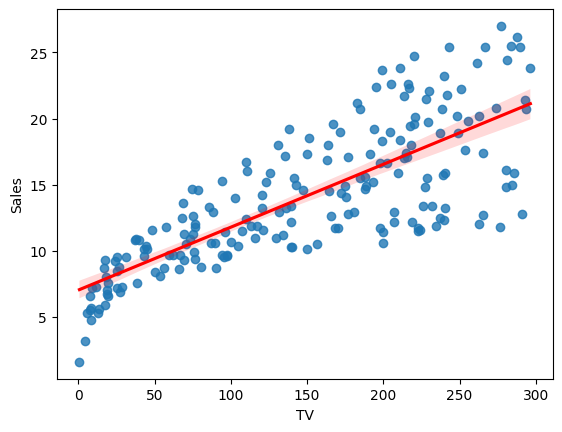

In [55]:
sns.regplot(x=X, y=y, ci=95, line_kws={"color":"red"})

In [62]:
X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "intercept", 1)

model = LinearRegression()
beta = model.fit(X, y)

test_sample = [1,230.1,37.8,69.2]
y_hat = model.predict([test_sample])

print(f"predicted sales for test sample{test_sample[1:]}: {y_hat[0]:.2f}")

predicted sales for test sample[230.1, 37.8, 69.2]: 20.52


/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Machine-learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
train_fraction = int(len(df)*0.7)

train = df.sample(n=train_fraction, random_state=42, replace=False)

val = df.drop(train.index)

X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"]
X_val, y_val = val.drop("Sales", axis="columns"), val["Sales"]

X_train.insert(0, "intercept", 1)
X_val.insert(0, "intercept", 1)

for dataset in ["X_train", "X_val", "y_train", "y_val"]:
    print(f"shape of {dataset}: {eval(dataset).shape}")

shape of X_train: (140, 4)
shape of X_val: (60, 4)
shape of y_train: (140,)
shape of y_val: (60,)


In [64]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

$MAE = \frac{1}{m} \sum\limits^{m}_{i=1}|y_{i}-\hat{y}_i|$

In [67]:
n = len(y_val)
y_hat = model.predict(X_val)

MAE = np.divide(1,n) * np.sum(np.abs(y_val - y_hat))
MSE = np.divide(1,n) * np.sum(np.square(y_val - y_hat))
RMSE = np.sqrt(MSE)
RSE = np.sqrt(np.divide(1,n-X_val.shape[1]-2) * np.sum(np.square(y_val - y_hat)))

MAE, MSE, RMSE, RSE

(np.float64(1.324449095972654),
 np.float64(3.540425618238522),
 np.float64(1.8816018755939106),
 np.float64(1.9833825255071817))